In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv("/Users/imch/workspace/projects/dacon/2024-Challenge/other/data/train.csv")

train_data.head()

,ID,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,y
0,TRAIN_00000,1.006187,-1.962566,1.247535,0.926500,-0.265766,-1.789301,0.470004,-0.139467,0.623996,0.320359,0.078612,83.424500
1,TRAIN_00001,1.024647,-2.472625,1.144386,0.846499,-0.287336,-1.756679,0.503860,-0.219545,0.697607,0.238306,0.081778,79.374109
2,TRAIN_00002,1.062444,-2.451003,1.186546,0.873599,-0.257828,-1.802735,0.498045,-0.194247,0.684134,0.259392,0.095003,82.181616
3,TRAIN_00003,1.089189,-2.458470,1.184531,0.810867,-0.276517,-1.787739,0.503359,-0.201923,0.686394,0.245736,0.091737,83.006586
4,TRAIN_00004,1.023323,-2.133468,1.242266,0.939837,-0.264515,-1.792044,0.470478,-0.142896,0.623778,0.314610,0.078987,83.051434


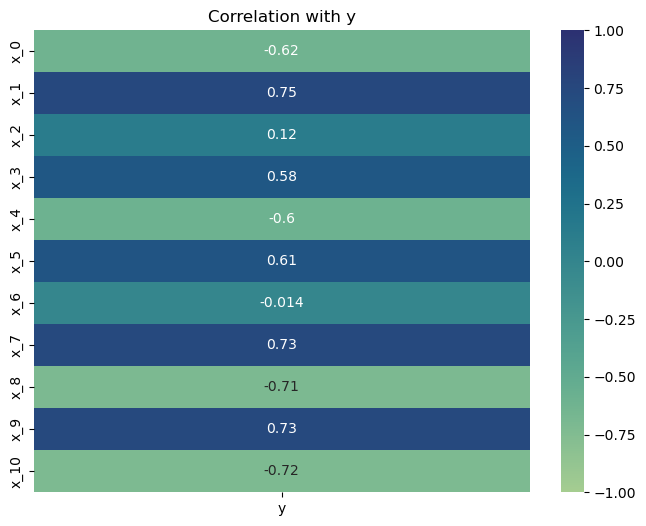

In [2]:
selected_columns = ['y', 'x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10']
correlation_matrix = train_data[selected_columns].corr()

correlation_with_y = correlation_matrix[['y']].drop('y')

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_y, annot=True, cmap='crest', vmin=-1, vmax=1)
plt.title('Correlation with y')
plt.show()

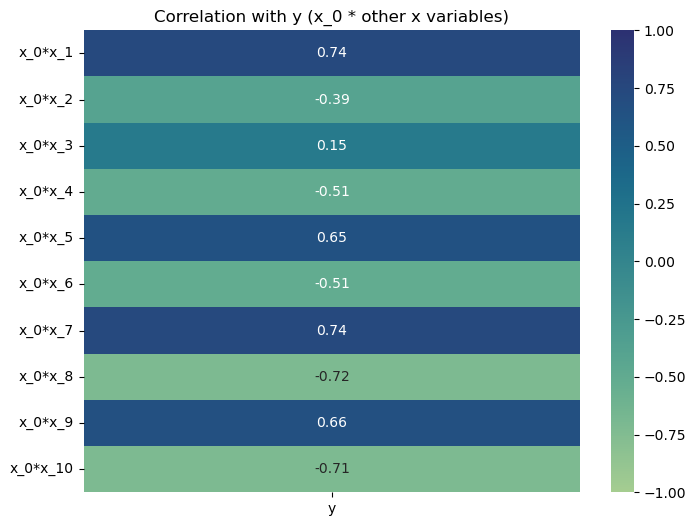

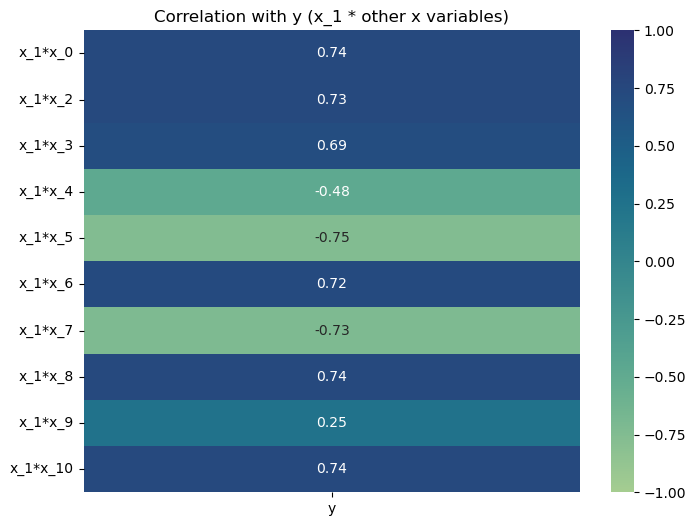

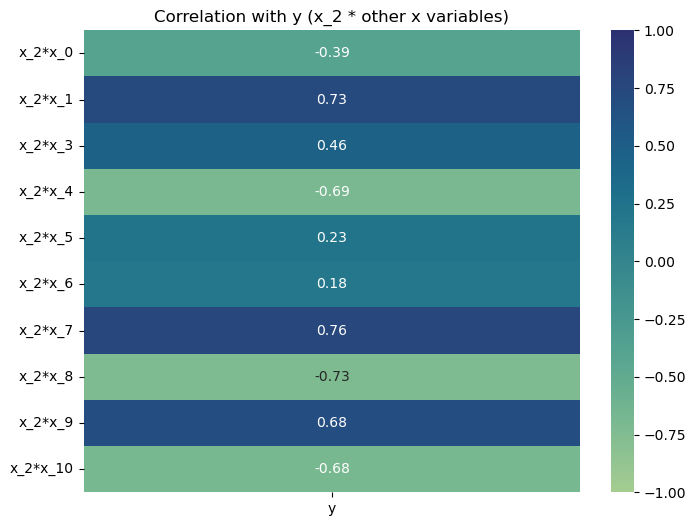

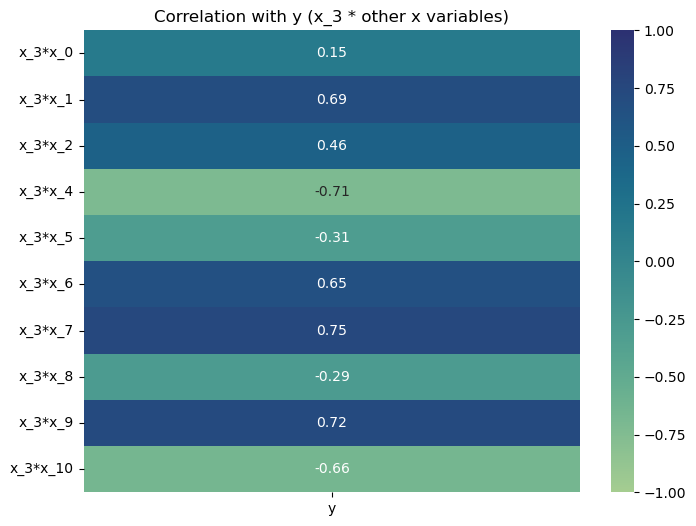

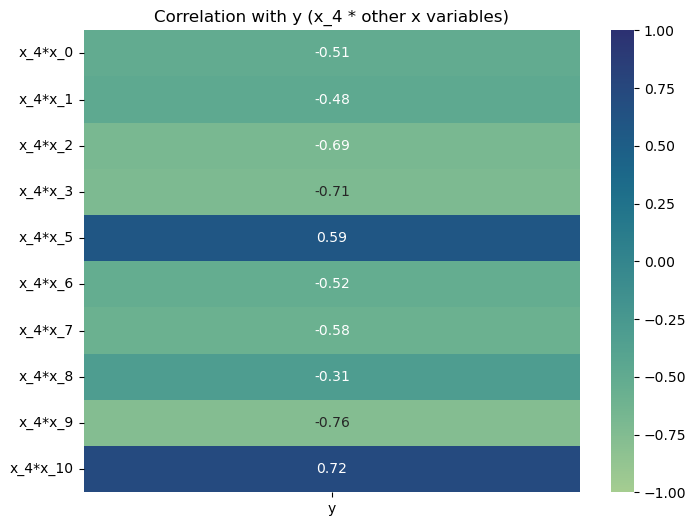

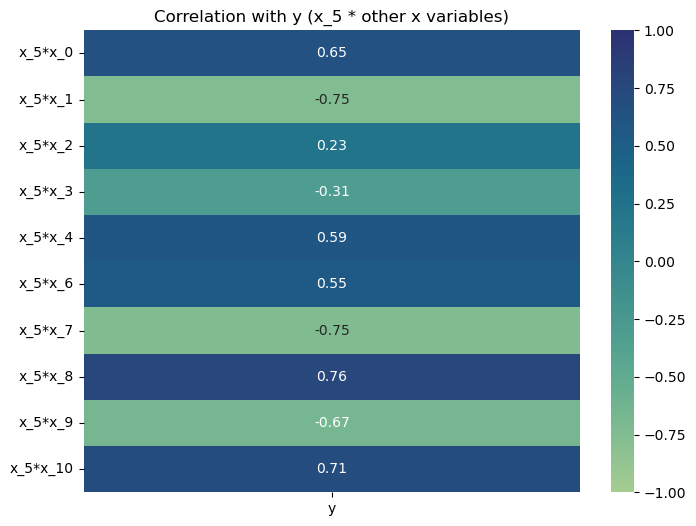

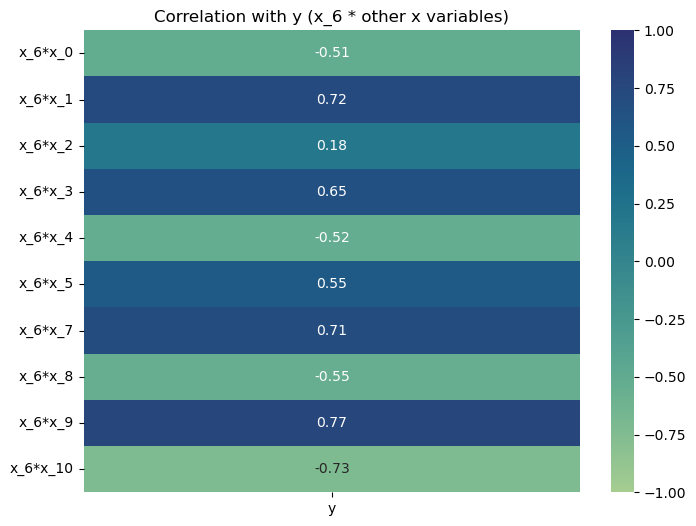

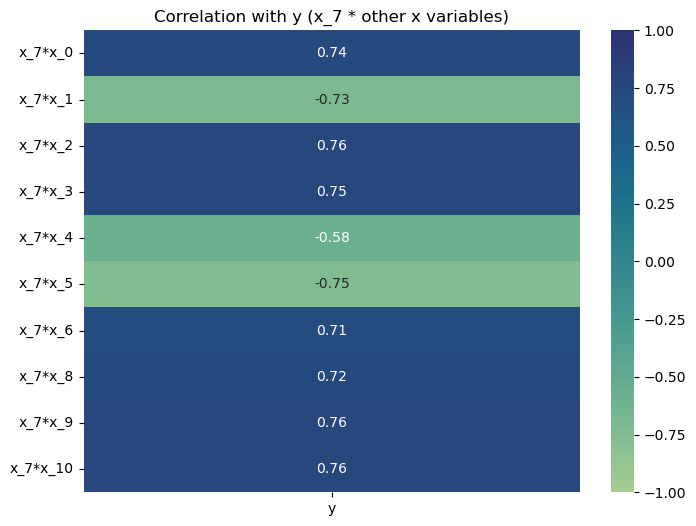

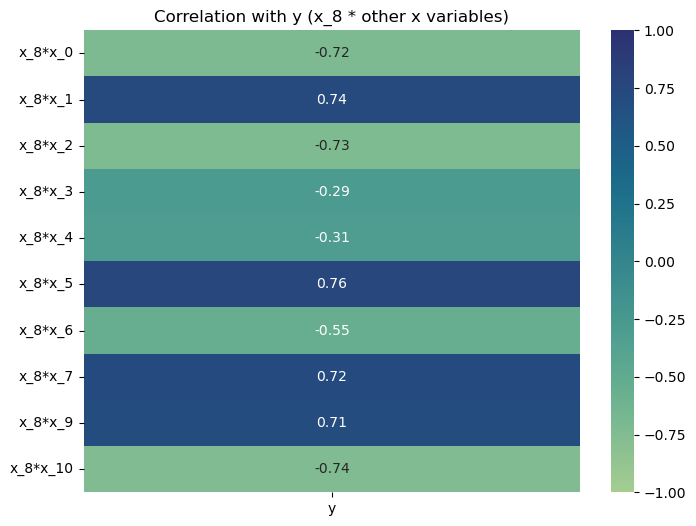

/var/folders/0_/hhnqbb6x4blb6n5sxhx0vbcw0000gn/T/ipykernel_23166/65750364.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_data[f'x_{x_base}*x_{i}'] = train_data[f'x_{x_base}'] * train_data[f'x_{i}']
/var/folders/0_/hhnqbb6x4blb6n5sxhx0vbcw0000gn/T/ipykernel_23166/65750364.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_data[f'x_{x_base}*x_{i}'] = train_data[f'x_{x_base}'] * train_data[f'x_{i}']
/var/folders/0_/hhnqbb6x4blb6n5sxhx0vbcw0000gn/T/ipykernel_23166/65750364.py:11: PerformanceWarning: DataFrame is 

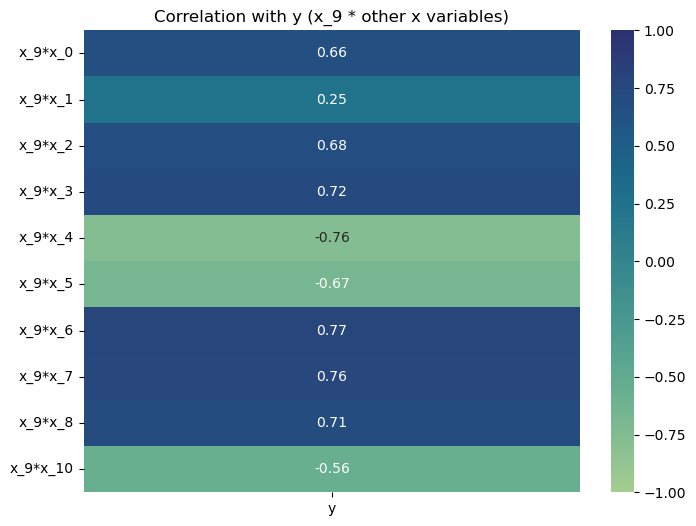

/var/folders/0_/hhnqbb6x4blb6n5sxhx0vbcw0000gn/T/ipykernel_23166/65750364.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_data[f'x_{x_base}*x_{i}'] = train_data[f'x_{x_base}'] * train_data[f'x_{i}']
/var/folders/0_/hhnqbb6x4blb6n5sxhx0vbcw0000gn/T/ipykernel_23166/65750364.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_data[f'x_{x_base}*x_{i}'] = train_data[f'x_{x_base}'] * train_data[f'x_{i}']
/var/folders/0_/hhnqbb6x4blb6n5sxhx0vbcw0000gn/T/ipykernel_23166/65750364.py:11: PerformanceWarning: DataFrame is 

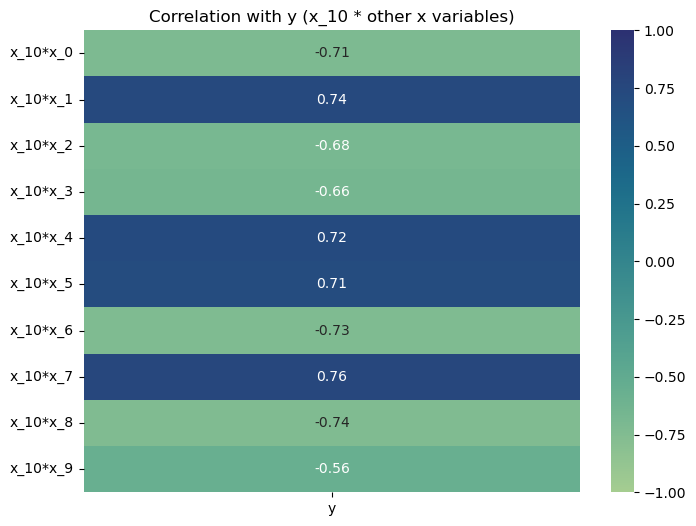

In [5]:
import pandas as pd
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

# x_0 ~ x_10 과 다른 변수들과의 곱 계산 및 상관계수 시각화
for x_base in range(11):
    # x_base와 나머지 x 변수들과의 곱 계산
    for i in range(11):
        if i != x_base:
            train_data[f'x_{x_base}*x_{i}'] = train_data[f'x_{x_base}'] * train_data[f'x_{i}']
    
    # 'y'와 x_base과 곱한 변수들 간의 상관계수 계산
    selected_columns = ['y'] + [f'x_{x_base}*x_{i}' for i in range(11) if i != x_base]
    correlation_matrix = train_data[selected_columns].corr()

    # 'y'와의 상관관계만 추출
    correlation_with_y = correlation_matrix[['y']].drop('y')

    # 상관계수 heatmap 시각화
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_with_y, annot=True, cmap='crest', vmin=-1, vmax=1)
    plt.title(f'Correlation with y (x_{x_base} * other x variables)')
    plt.show()